<a href="https://colab.research.google.com/github/ItoroKoffi/SCAMP-C6-Assessment/blob/main/Job_Posting_Industry_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fake Job Posting Industry Analysis**

By Itoro Koffi

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [4]:
#importing dataset
from google.colab import files
uploaded = files.upload()

Saving fake_job_postings.csv to fake_job_postings.csv


In [5]:
#converting imported dataset into dataframe
df = pd.read_csv(io.BytesIO(uploaded['fake_job_postings.csv']))

In [6]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [8]:
df.groupby("fraudulent")["fraudulent"].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

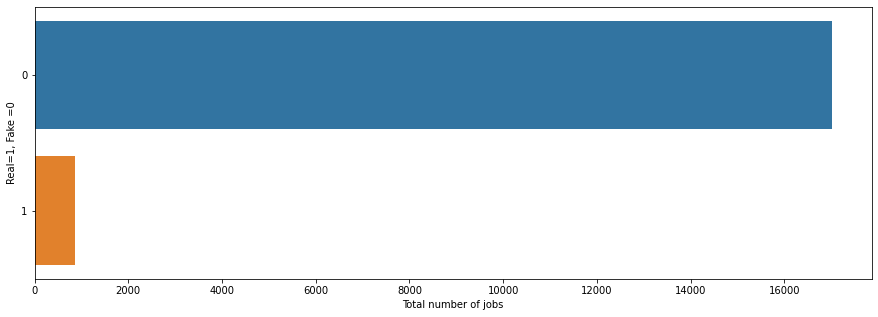

In [9]:
#plot of fraudulent and non-fraudulent postings
plt.figure(figsize=(15,5))
sns.countplot(y="fraudulent", data=df)
plt.xlabel("Total number of jobs")
plt.ylabel("Real=1, Fake =0")
plt.show()

In [10]:
#Count of industries
industry_count = len(pd.unique(df['industry']))
  
print("No.of.industries :", 
      industry_count)

No.of.industries : 132


In [11]:
# visualizing top 10 industry in table format 
top_fake_countries=df.groupby("industry")[["fraudulent"]].sum()
top_fake_countries=top_fake_countries.sort_values("fraudulent",ascending=False).head(10)
top_fake_countries



,fraudulent
industry,
Oil & Energy,109
Accounting,57
Hospital & Health Care,51
Marketing and Advertising,45
Financial Services,35
Information Technology and Services,32
Telecommunications,26
Consumer Services,24
Real Estate,24


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


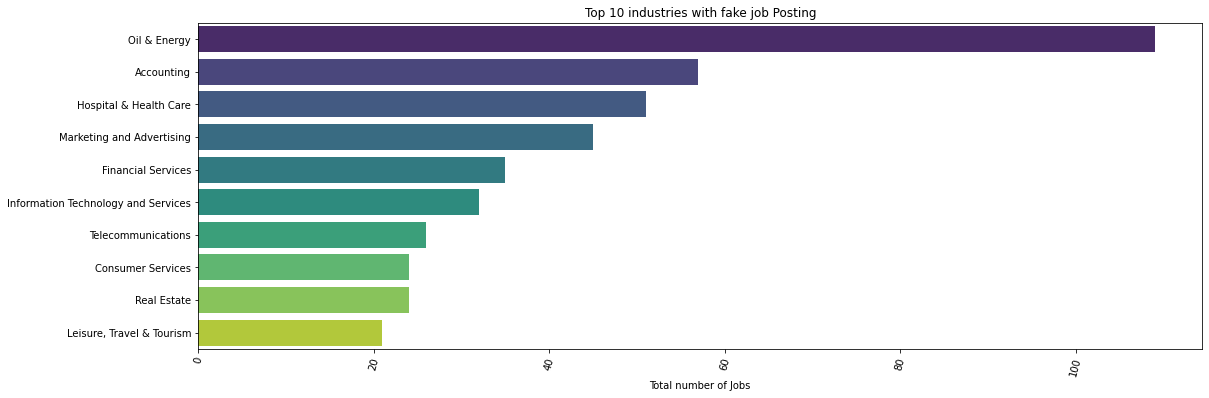

In [12]:
# visualizing top 10 industries
sns.set_style=("whitegrid")
plt.figure(figsize=(18,6))
plt.xticks(rotation=75)
plt.title("Top 10 industries with fake job Posting")
sns.barplot(top_fake_countries.fraudulent,top_fake_countries.index, palette="viridis");
plt.xlabel("Total number of Jobs")
plt.ylabel(None);

The Oil and Energy Industry has the highest number of fake job postings. 109 out of the 287 jobs posted are fake.